## Description

Необходимо помесячно предсказать объем продаж квартир в квадратных метрах на февраль, март, апрель 2018г. Предсказание делается для каждого сета - набора квартир из одного корпуса (id_bulk), с одинаковой комнатностью (spalen). 

Публичный рейтинг строится на основе 75% test-сета. Финальный рейтинг по 100% test-сета будет построен после завершения публичной части соревнования и появится в разделе «Результаты». Метрика оценки качества решения - RMSE.

- **train.csv**
Тренировочный датасет, в каждой строчке в поле value указан объем продаж в квадратных метрах в соответствующий месяц по соответствующему сету.
- **test.csv**
Тестовый датасет, предсказание необходимо сделать по каждому сету на февраль, март, апрель 2018г. По сравнению с train в test нет полей: start_square, plan_s, plan_m, plan_l, vid_0, vid_1, vid_2. Данные поля удалены т.к. могут быть некорректно использованы при расчет объема продаж в прошлом месяце в тестовом периоде.
- **flat.csv**
Параметры всех квартир, в поле sale указана дата продажи квартиры (кроме test периода), для непроданных квартир за train период в поле sale указан 01.01.2020г.
- **status.csv**
История изменения статусов по каждой квартире (кроме test периода). Информация о резервах может быть очень полезна для предсказания первого месяца тестового периода.
- **price.csv**
История изменения цены по каждой квартире (кроме test периода)

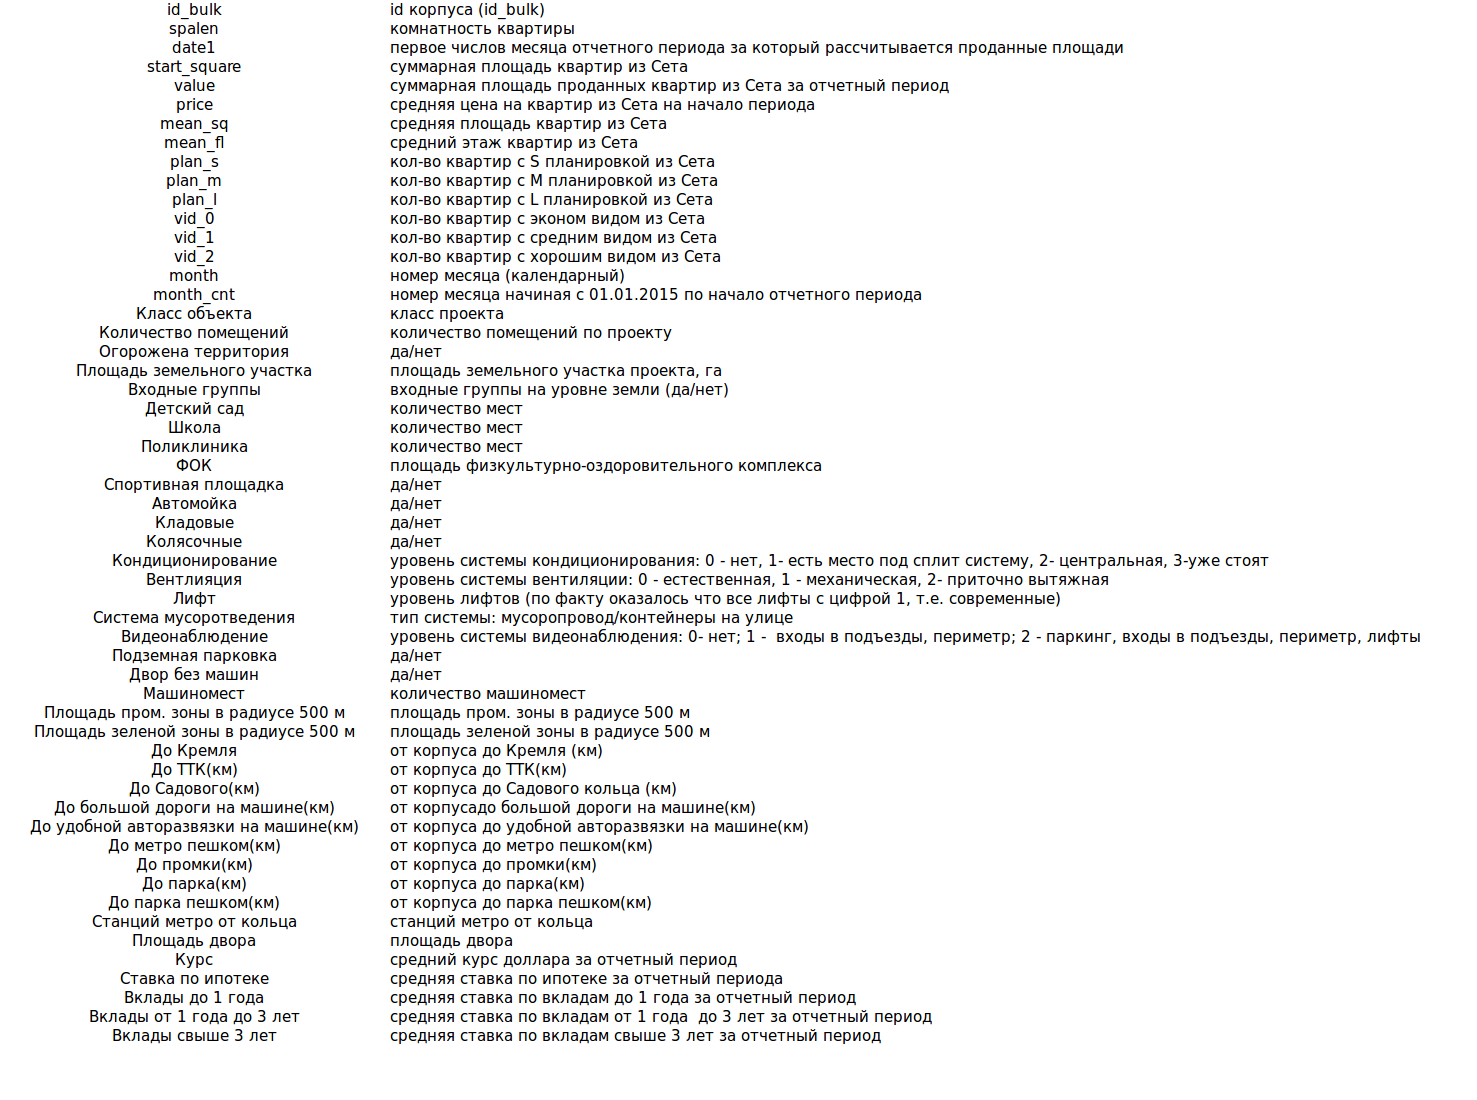

## Load

In [1]:
import pandas as pd, numpy as np

In [2]:
train = pd.read_csv('data/train.csv', index_col='id', encoding='cp1251')
test = pd.read_csv('data/test.csv', index_col='id', encoding='cp1251')

flat = pd.read_csv('data/flat.csv', encoding='cp1251')

In [3]:
flat.head().T

,0,1,2,3,4
id_sec,846EA675-93FF-E411-8098-001EC9D56418,846EA675-93FF-E411-8098-001EC9D56418,846EA675-93FF-E411-8098-001EC9D56418,846EA675-93FF-E411-8098-001EC9D56418,846EA675-93FF-E411-8098-001EC9D56418
floor,2,2,2,2,2
spalen,3,1,1,0,2
stage_number,1,2,3,4,5
square,85.9,34.2,33.7,22.4,57.5
balcon,0,0,0,0,0
otdelka,Не производится,Не производится,Не производится,Не производится,Не производится
plan0,3M-1*,1S-1*,1S-2*,S-1*,2M-1
id_bulk,4B3B6D6A-93FF-E411-8098-001EC9D56418,4B3B6D6A-93FF-E411-8098-001EC9D56418,4B3B6D6A-93FF-E411-8098-001EC9D56418,4B3B6D6A-93FF-E411-8098-001EC9D56418,4B3B6D6A-93FF-E411-8098-001EC9D56418
section,1,1,1,1,1


In [4]:
train.head().T

id,0,1,2,3,4
bulk_id,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B
spalen,1,2,0,3,1
date1,2017-10-01,2017-10-01,2017-10-01,2017-10-01,2017-11-01
start_square,13109.9,19898.4,2100,9614.9,11947.2
value,1124.5,1412.3,345,769.4,526.7
price,135634,128492,158238,123250,139421
mean_sq,38,58.01,22.58,78.81,37.93
mean_fl,8,9,10,8,9
plan_s,147,139,78,50,140
plan_m,198,120,15,0,175


In [5]:
test.head().T

id,0,1,2,3,4
bulk_id,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B,FF3814A9-9F7D-E711-8530-00505688958B
spalen,1,2,0,3,1
date1,2018-02-01,2018-02-01,2018-02-01,2018-02-01,2018-03-01
price,144734,136730,167788,132855,147387
mean_sq,37.97,57.78,23.21,79.39,37.99
mean_fl,9,9,10,9,9
month,2,2,2,2,3
month_cnt,38,38,38,38,39
Класс объекта,эконом,эконом,эконом,эконом,эконом
Количество помещений,1983,1983,1983,1983,1983


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Feature preparation

### Date split

In [7]:
import time
from tqdm._tqdm_notebook import tqdm_notebook

import urllib.request as ur  

In [8]:
def holidays(d, m, year):
    time.sleep(0.2)
    elevations = ur.urlopen("https://kayaposoft.com/enrico/json/v2.0/?action=isPublicHoliday&date="+str(d)+'-'+str(m)+'-'+str(year)+"&country=ru").read()
    data = json.loads(elevations)
    if data['isPublicHoliday'] == True:
        return 1
    else:
        return 0

def extr(df, date_column):
    df.at[df[pd.isnull(df[date_column])].index, date_column] = '2017-02-01'
    
    tmp = pd.DataFrame(list(zip(df[date_column].unique(), [holidays(d.split('-')[2], d.split('-')[1], d.split('-')[0]) for d in tqdm_notebook(df[date_column].unique())])), 
                       columns=['date', 'value'])
    
    df['holiday'] = df[date_column].apply(lambda x: tmp.loc[tmp['date'] == x,'value'].values[0])
    df['tm_year'] = df[date_column].apply(lambda x: time.strptime(str(x), '%Y-%m-%d')[0])
    df['tm_mon'] = df[date_column].apply(lambda x:  time.strptime(str(x), '%Y-%m-%d')[1])
    df['tm_mday'] = df[date_column].apply(lambda x: time.strptime(str(x), '%Y-%m-%d')[2])
    df['tm_wday'] = df[date_column].apply(lambda x: time.strptime(str(x), '%Y-%m-%d')[6])
    df['tm_yday'] = df[date_column].apply(lambda x: time.strptime(str(x), '%Y-%m-%d')[7])
    del df[date_column]
    return df

In [9]:
train = extr(train, 'date1')
test = extr(test, 'date1')

In [10]:
dop_cat_cols = ['spalen', 'month', 'Спортивная площадка', 'Кондиционирование', 
                'Вентлияция', 'Видеонаблюдение', 'holiday', 'tm_year', 'tm_mon', 'tm_mday','tm_wday']
drop_colm = ['Лифт', 'Система мусоротведения']

train.drop(drop_colm, axis=1, inplace=True)
test.drop(drop_colm, axis=1, inplace=True)

TODO сколько дней до праздника

## EDA

In [11]:
def plot_duplicatesplot_dup (df):
    df = df.dropna(axis=1, thresh = 10)
    result = {col:df.duplicated([col]).sum() for col in df.columns}
    plt.figure(figsize=(4,10))
    plt.barh(list(result.keys()), list(result.values()), color='g', alpha=0.5)
    plt.show()

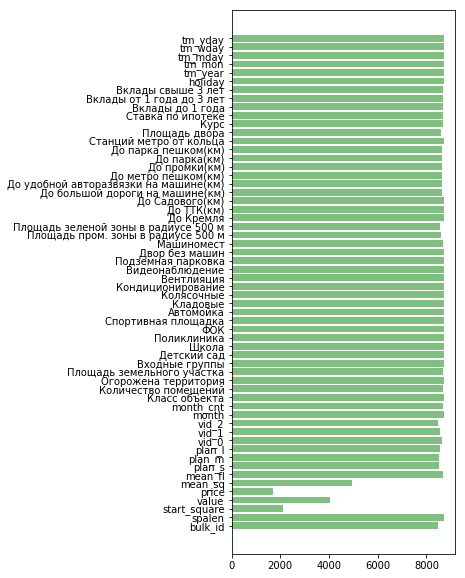

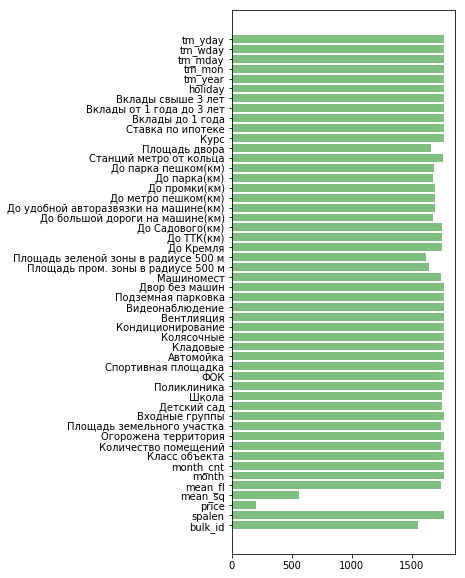

In [12]:
plot_duplicatesplot_dup(train)
plot_duplicatesplot_dup(test)   

In [13]:
def val_count(df):
    for col in df.columns:
        print(df[col].value_counts(normalize=True).head(10), 'Len: ', df[col].value_counts(normalize=True).shape,'\n')

In [14]:
val_count(train)

8B5D0C0E-C378-E511-B4A4-001EC9D5643C    0.015013
E435277C-002B-E511-82D8-001EC9D5643C    0.013752
D04F1379-5729-E511-84C6-001EC9D56418    0.013294
59BCC6D3-7204-E511-8C7F-001EC9D5643C    0.012950
67A58823-AFC9-E511-9405-001EC9D56418    0.012721
8B240E6D-7FCA-E511-9405-001EC9D56418    0.012606
8421806C-5D3E-E411-988B-001EC9D5643C    0.010887
C78A74B1-07DD-E411-9A07-001EC9D56418    0.010772
4B3B6D6A-93FF-E411-8098-001EC9D56418    0.010658
B526E7C2-5C3E-E411-988B-001EC9D5643C    0.010429
Name: bulk_id, dtype: float64 Len:  (233,) 

1    0.274238
2    0.258538
3    0.234242
0    0.169608
4    0.063374
Name: spalen, dtype: float64 Len:  (5,) 

87.50      0.003323
45.40      0.003209
44.18      0.003094
22.40      0.002063
1691.00    0.001948
1493.70    0.001948
39.80      0.001948
455.00     0.001948
118.20     0.001719
22.70      0.001719
Name: start_square, dtype: float64 Len:  (6607,) 

0.00     0.210864
22.70    0.003553
81.10    0.003438
45.40    0.002521
44.18    0.002177
22.50    0.0

In [15]:
val_count(test)

F10C7B44-9682-E711-8530-00505688958B    0.008475
E806378B-4566-E711-97EC-001EC9D56418    0.008475
1AD77F71-D449-E711-97EC-001EC9D56418    0.008475
8CEB3310-63E8-E611-B887-001EC9D5643C    0.008475
999F708D-4FE9-E711-B9FF-00505688958B    0.008475
EEA80383-6E98-E711-8530-00505688958B    0.008475
A0B7B63B-6DAF-E711-8547-00505688958B    0.008475
B94A67F6-6498-E711-8530-00505688958B    0.008475
460B6880-F8BE-E711-BC64-00505688958B    0.008475
F7353C5B-D61D-E711-96FE-001EC9D5643C    0.008475
Name: bulk_id, dtype: float64 Len:  (215,) 

1    0.271751
2    0.266102
3    0.240113
0    0.146328
4    0.075706
Name: spalen, dtype: float64 Len:  (5,) 

92000.0     0.004520
99000.0     0.003390
105000.0    0.003390
91000.0     0.003390
98000.0     0.003390
85000.0     0.002825
89000.0     0.002825
95500.0     0.002260
113000.0    0.002260
91800.0     0.002260
Name: price, dtype: float64 Len:  (1569,) 

39.80    0.005650
60.91    0.005085
22.70    0.004520
19.90    0.004520
22.90    0.004520
46.80    

In [16]:
train.nunique(dropna=False)

bulk_id                                   233
spalen                                      5
start_square                             6607
value                                    4676
price                                    7025
mean_sq                                  3792
mean_fl                                    32
plan_s                                    201
plan_m                                    196
plan_l                                    185
vid_0                                     105
vid_1                                     186
vid_2                                     243
month                                      12
month_cnt                                  31
Класс объекта                               3
Количество помещений                       29
Огорожена территория                        2
Площадь земельного участка                 29
Входные группы                              2
Детский сад                                21
Школа                             

In [17]:
test.nunique(dropna=False)

bulk_id                                   215
spalen                                      5
price                                    1569
mean_sq                                  1206
mean_fl                                    31
month                                       3
month_cnt                                   3
Класс объекта                               3
Количество помещений                       29
Огорожена территория                        2
Площадь земельного участка                 29
Входные группы                              2
Детский сад                                21
Школа                                      16
Поликлиника                                 4
ФОК                                         2
Спортивная площадка                         1
Автомойка                                   2
Кладовые                                    2
Колясочные                                  2
Кондиционирование                           3
Вентлияция                        

In [18]:
def comare_df(df1, df2):
    for col in df1.columns:
        if col in df2.columns:
            ind = df1[col].isin(df2[col]) & df2[col].isin(df1[col])
            print(col, sum(ind))

Предсказать для теста - start_square, plan_s, plan_m, plan_l, vid_0, vid_1, vid_2

Вот и лики подъехали

In [19]:
comare_df(train, test)

bulk_id 1196
spalen 1770
price 45
mean_sq 262
mean_fl 1769
month 361
month_cnt 0
Класс объекта 1770
Количество помещений 1770
Огорожена территория 1770
Площадь земельного участка 1770
Входные группы 1770
Детский сад 1770
Школа 1770
Поликлиника 1770
ФОК 1770
Спортивная площадка 1770
Автомойка 1770
Кладовые 1770
Колясочные 1770
Кондиционирование 1770
Вентлияция 1770
Видеонаблюдение 1770
Подземная парковка 1770
Двор без машин 1770
Машиномест 1770
Площадь пром. зоны в радиусе 500 м 1484
Площадь зеленой зоны в радиусе 500 м 1342
До Кремля 1770
До ТТК(км) 1770
До Садового(км) 1750
До большой дороги на машине(км) 1472
До удобной авторазвязки на машине(км) 1679
До метро пешком(км) 1713
До промки(км) 1716
До парка(км) 1674
До парка пешком(км) 1662
Станций метро от кольца 1770
Площадь двора 1389
Курс 0
Cтавка по ипотеке 0
Вклады до 1 года 0
Вклады от 1 года до 3 лет 0
Вклады свыше 3 лет 0
holiday 1459
tm_year 74
tm_mon 361
tm_mday 1770
tm_wday 445
tm_yday 287


In [20]:
def hist(data, name, col, count, dir_name, show):
    '''
    data - value counts Series
    name - additional name for your plot
    count - the shape of value counts
    dir_name - additional directory for plot
    show - plot show or not
    '''
    plt.close()
    plt.figure(figsize=(8,10))
    plt.barh(data.index, data.values, color='g', alpha=0.6)
    plt.xlabel('Count')
    plt.ylabel('Top 15 values of ' + str(count))
    plt.title(col)
    
    if dir_name != None:
        if dir_name not in os.listdir('plot'):
            os.mkdir('plot/' + dir_name+'/')
        plt.savefig('plot/' + dir_name+ '/' + name + "_test_" + col + ".png")
    else:
        plt.savefig('plot/' + name + "_test_" + col + ".png")

    if show == True:
        plt.show()
    else:
        plt.ioff()
        plt.close()

def val_count(df, m_plot = False, name = 'Test', dir_name = None, show = True):
    ''' 
    
    Vizualize count of top 15 values in each column of the inputed DataFrame.
    
    m_plot: bool([True, False]), show pd.Series value count for each column. Saving each plot;
    name: str(), additional name for plot (if m_plot = True);
    dir_name: str(), default(None), additional directory for your plots;
    show: bool([True, False]), show your plot in notebook
    
    '''
    
    for col in df.columns:
        if m_plot == False:
            print (df[col].value_counts().head(15))
            print ('Column val_count ' + str(col) + ' shape: ' + str(df[col].value_counts().shape))
        else:
            hist(df[col].value_counts().head(15), name, col, df[col].value_counts().shape[0], dir_name, show)
            plt.close()

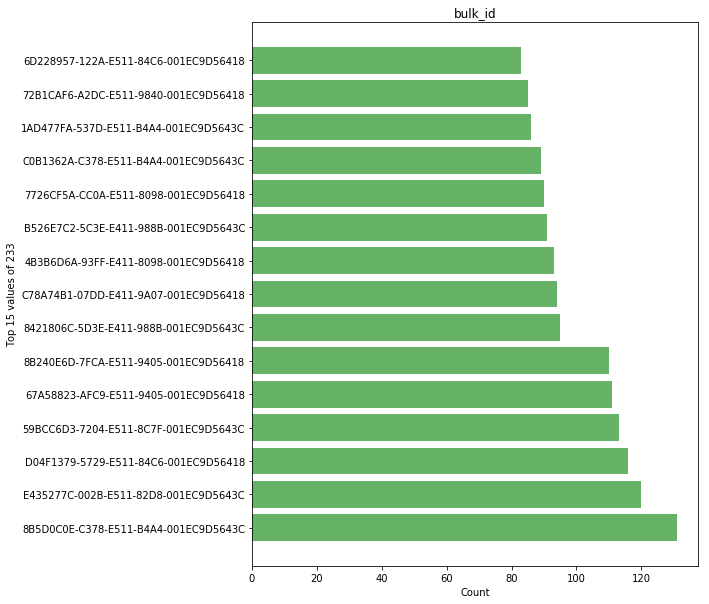

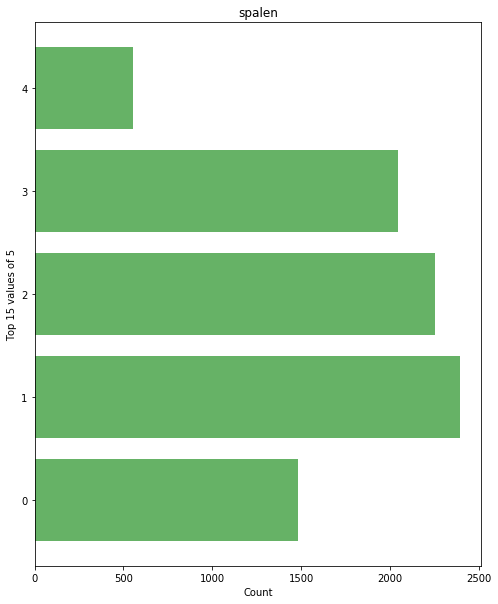

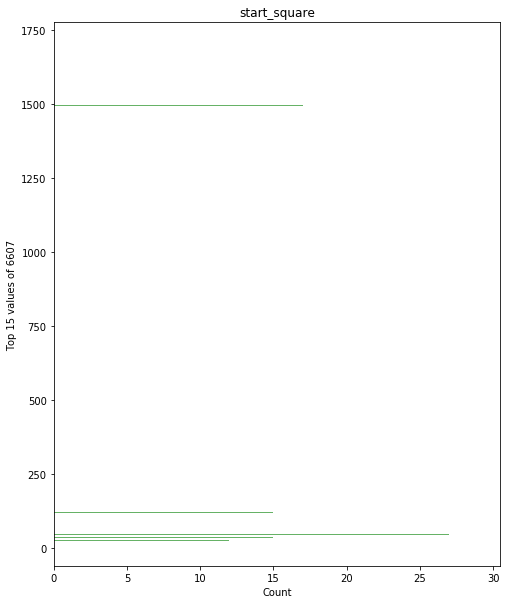

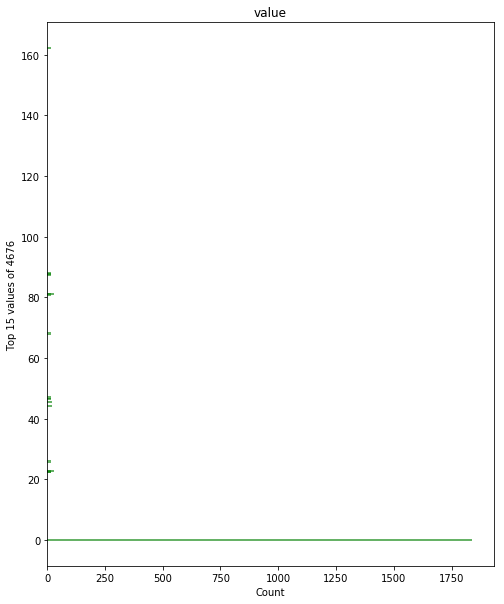

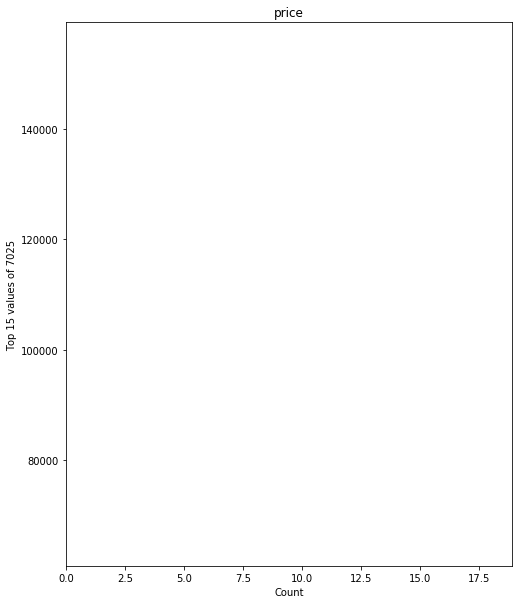

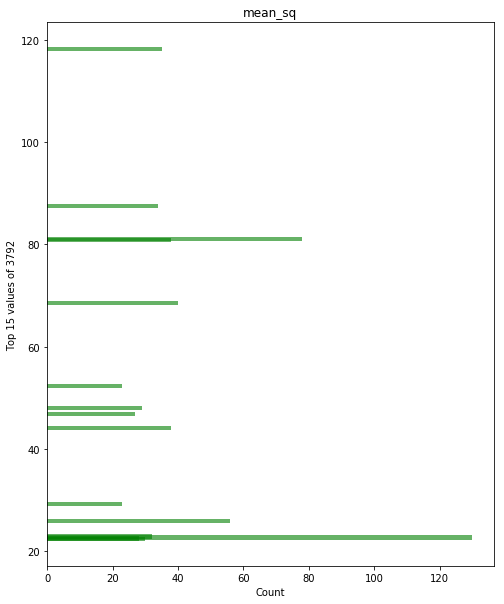

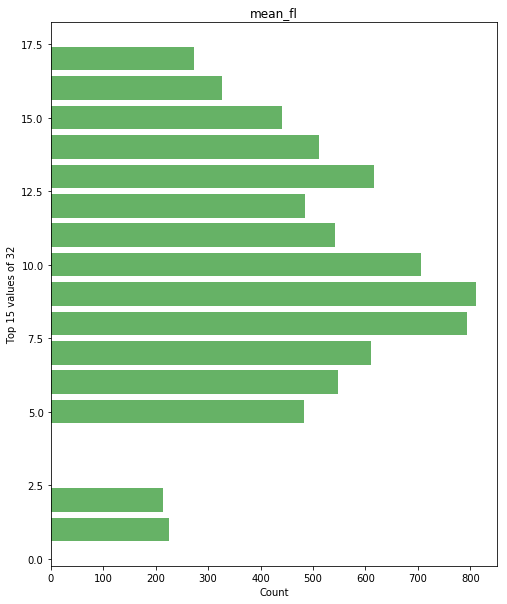

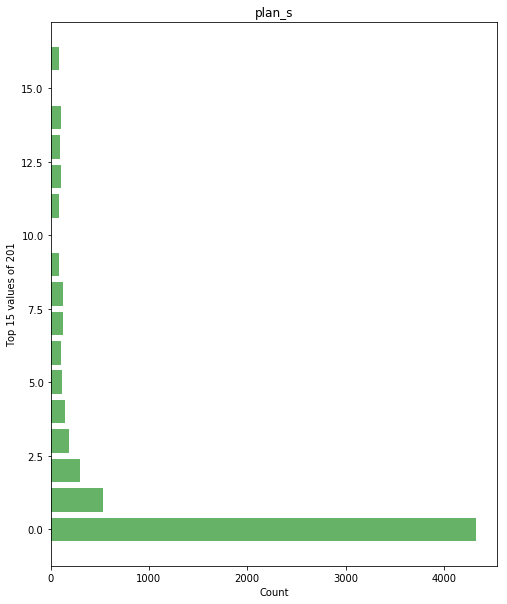

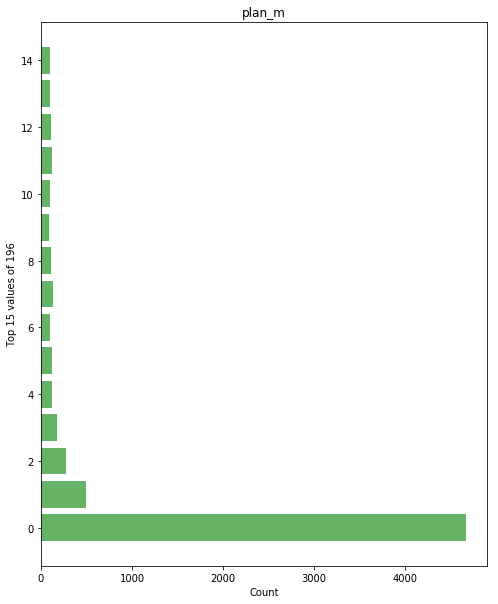

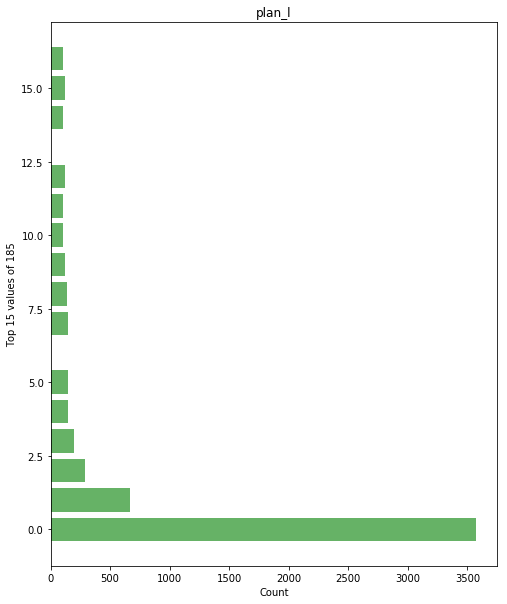

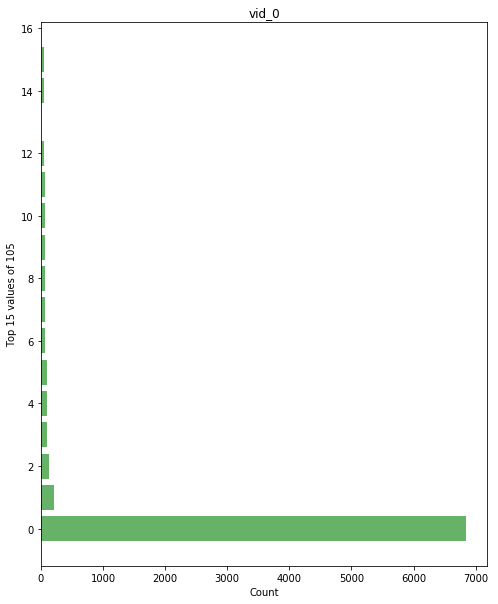

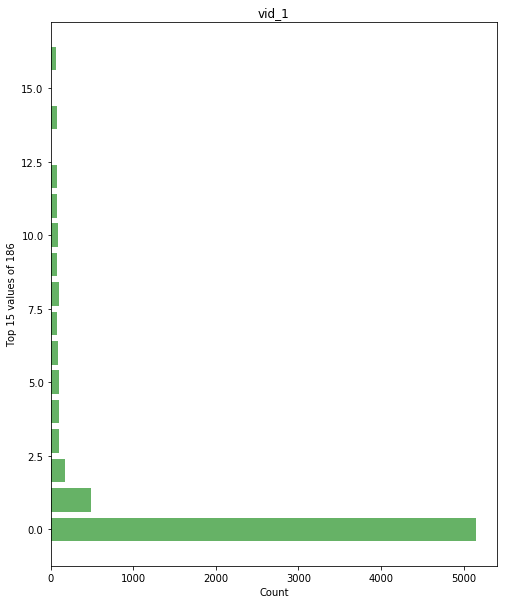

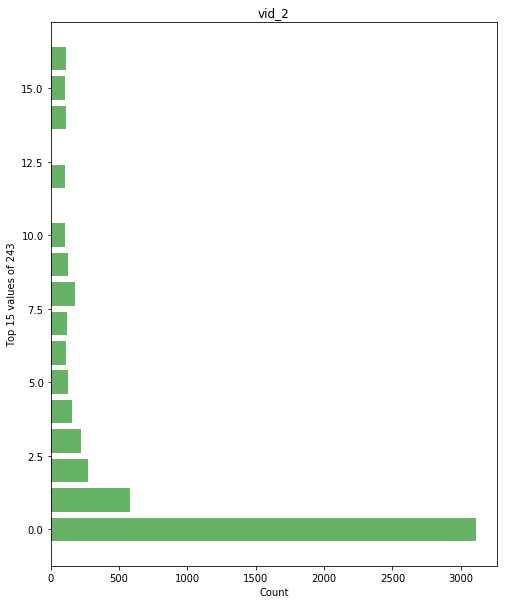

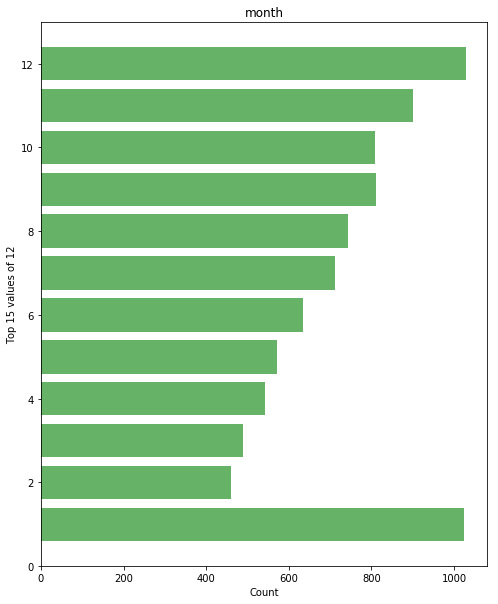

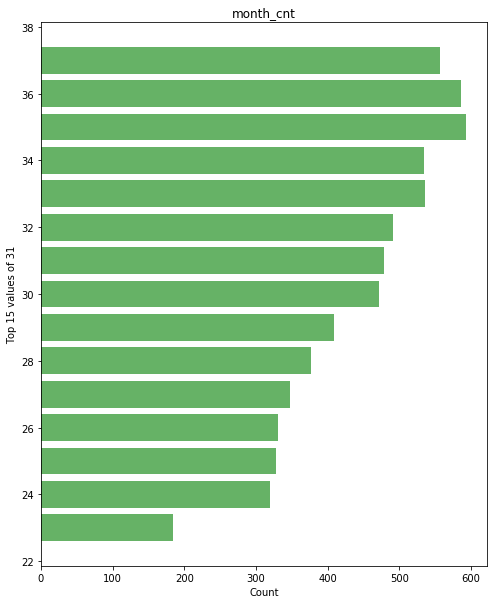

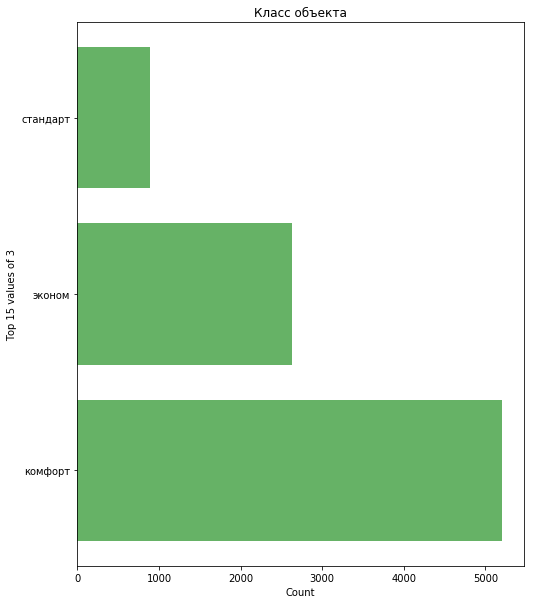

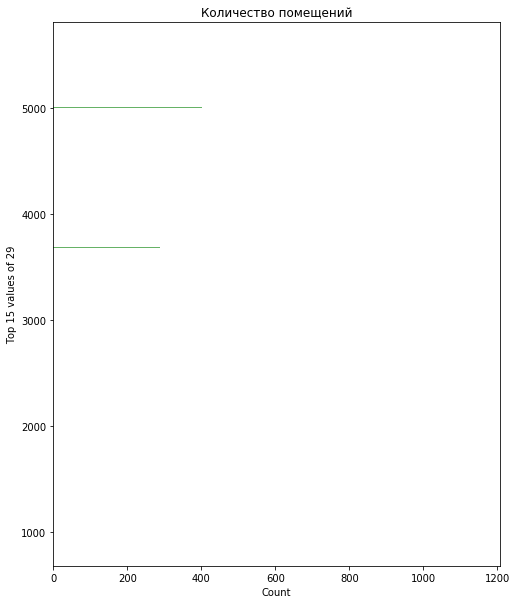

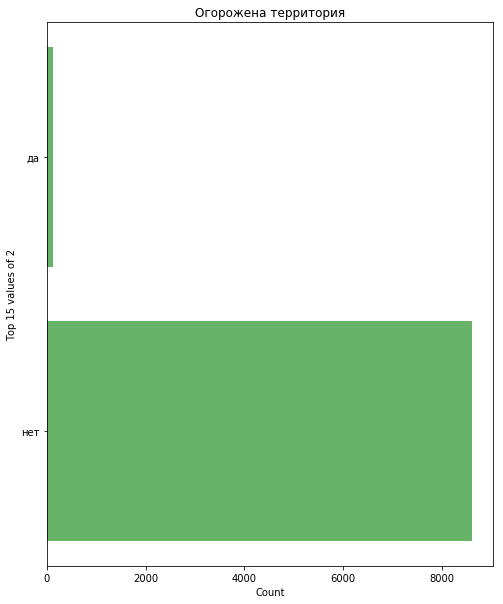

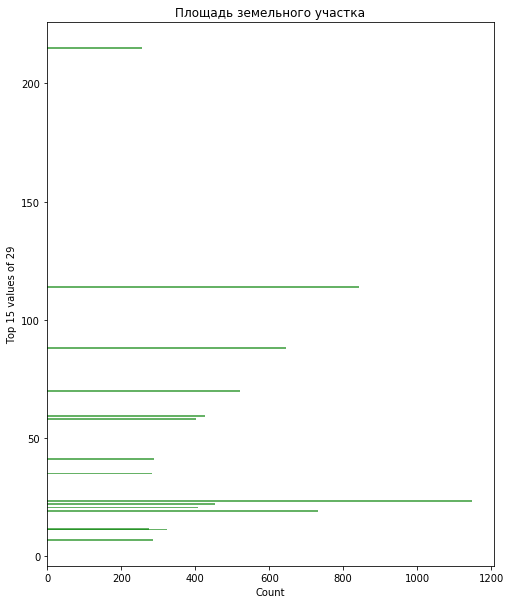

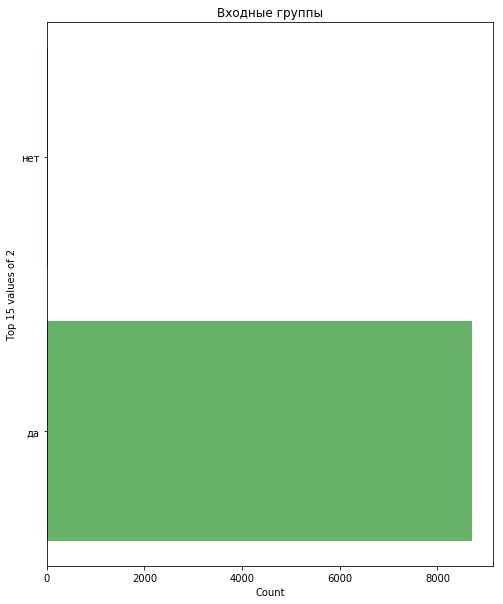

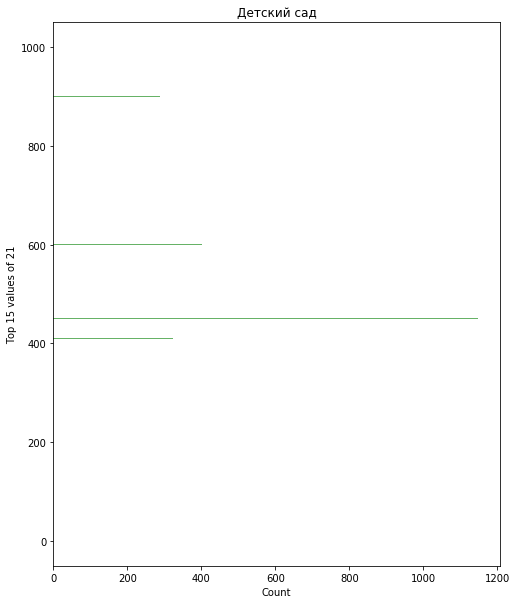

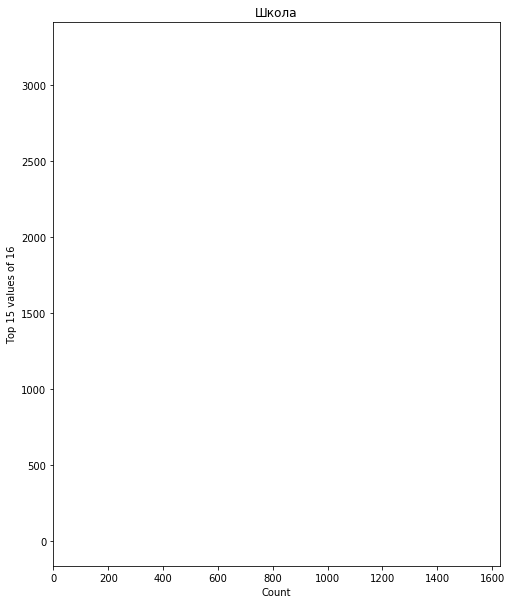

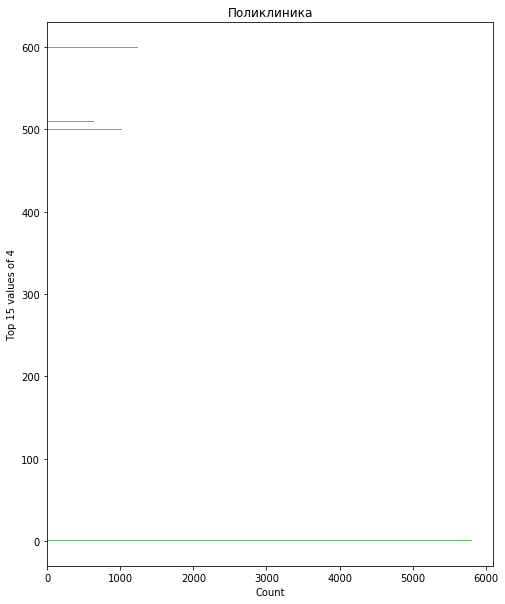

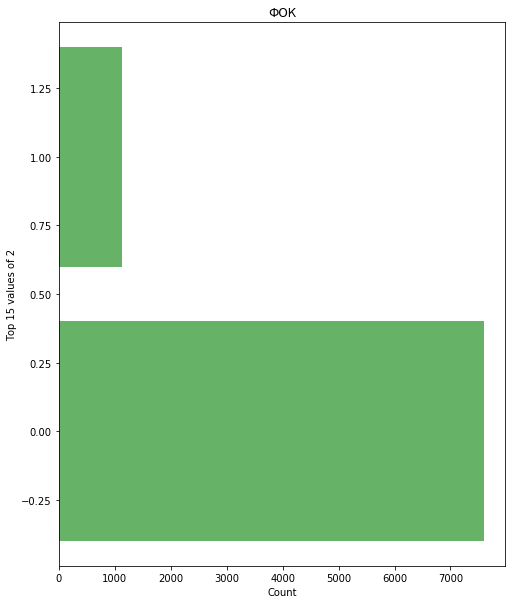

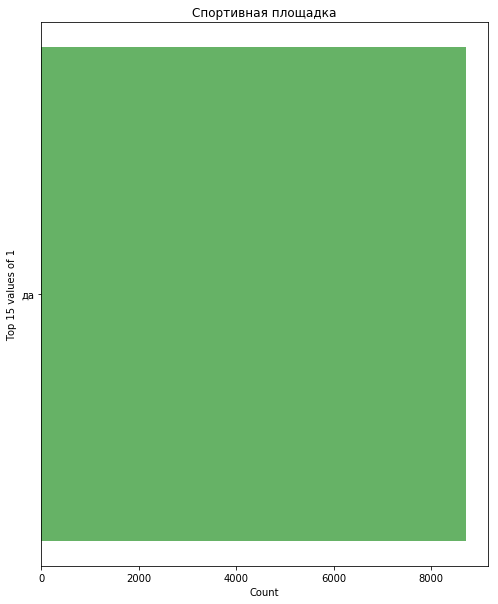

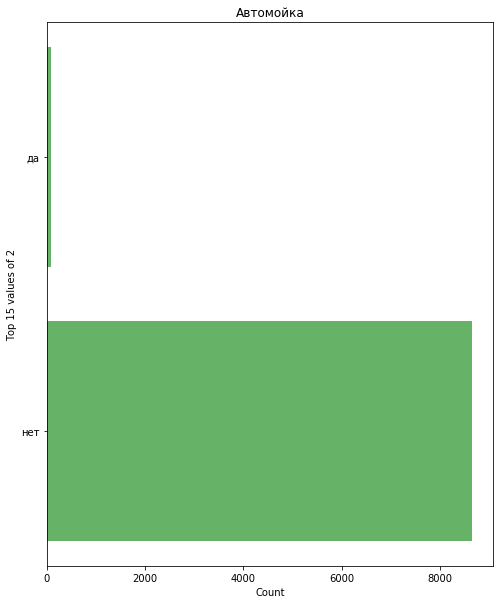

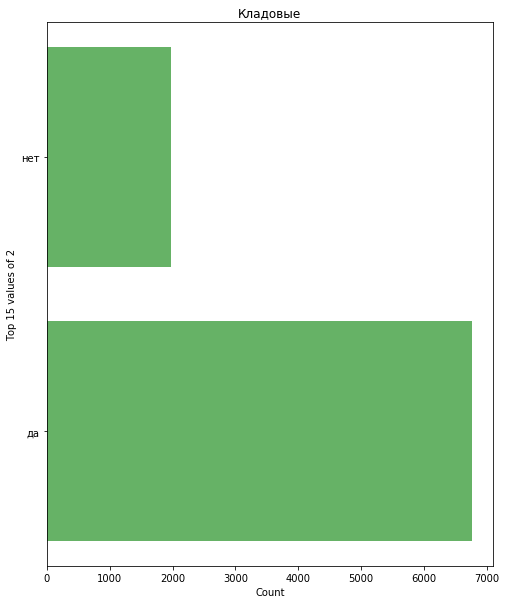

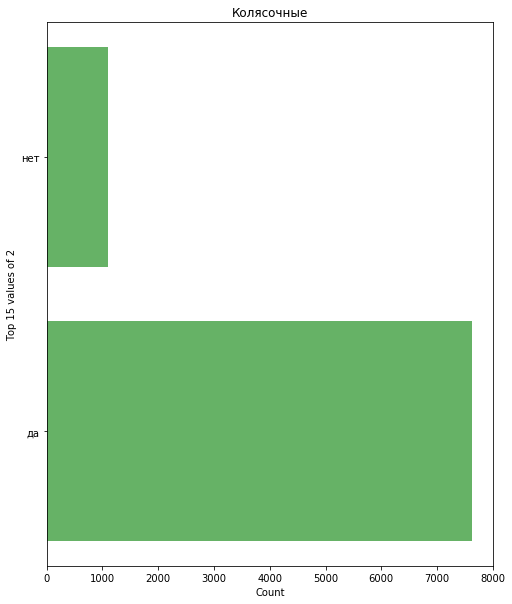

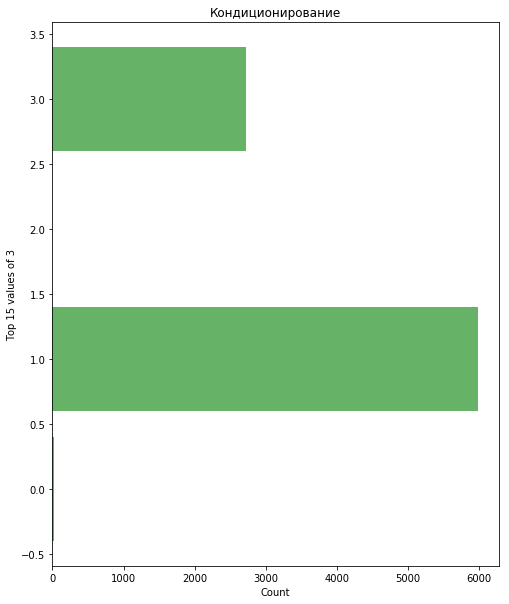

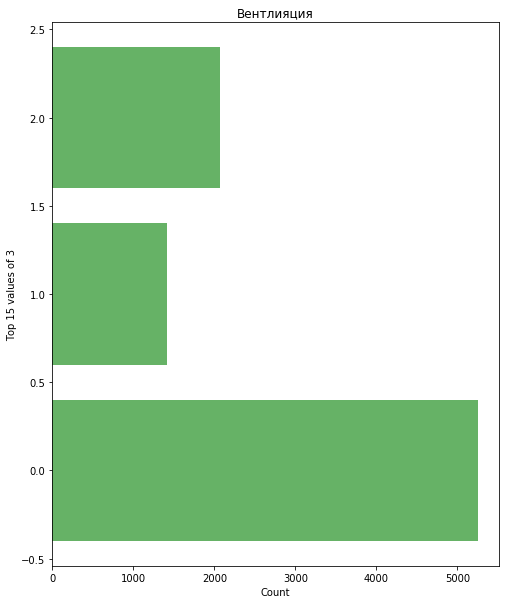

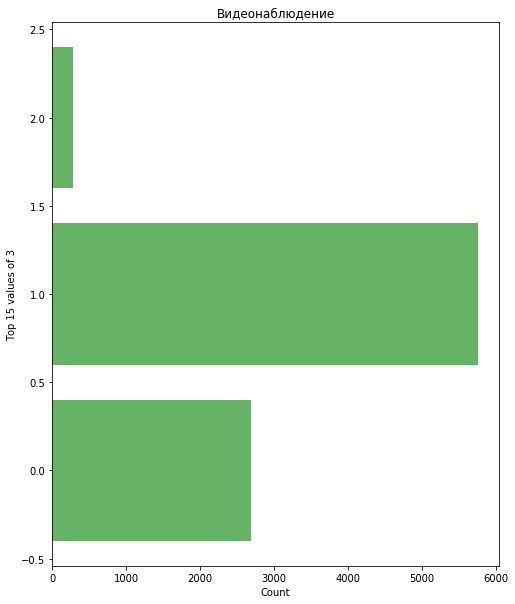

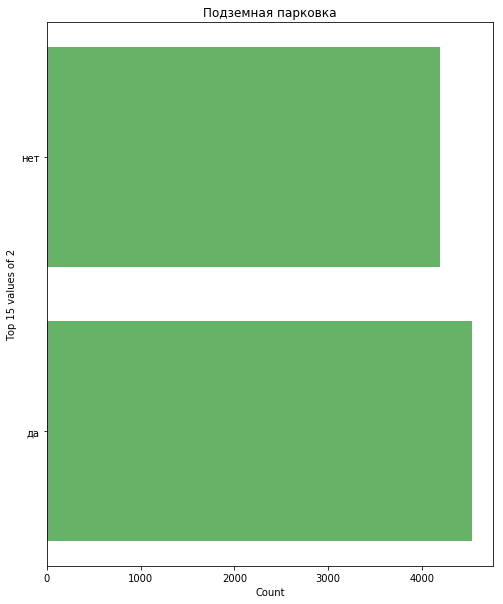

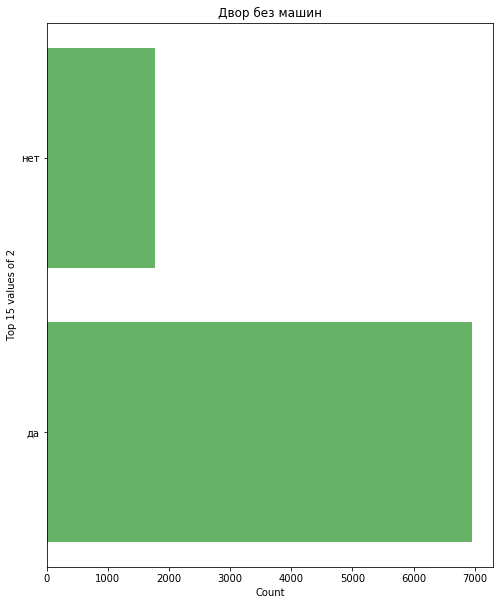

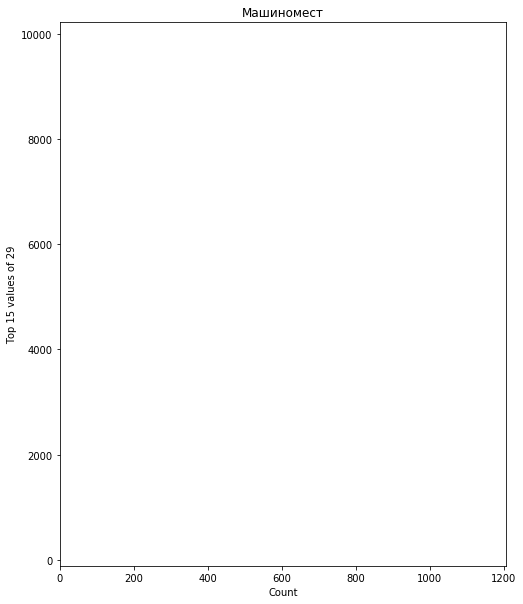

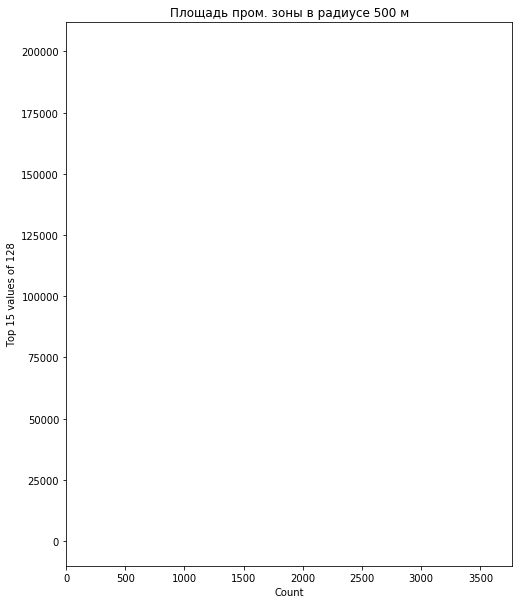

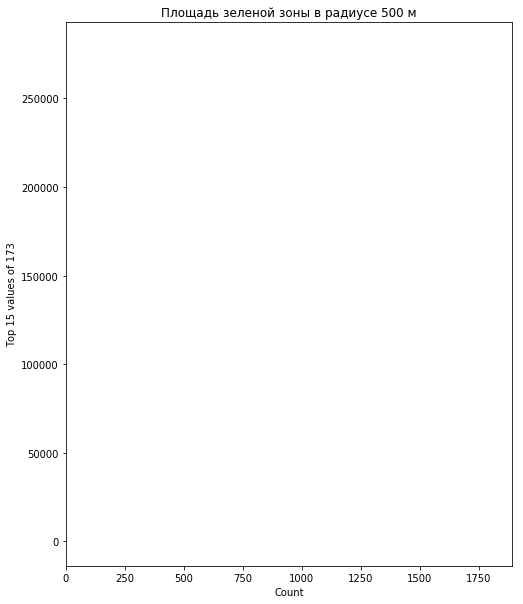

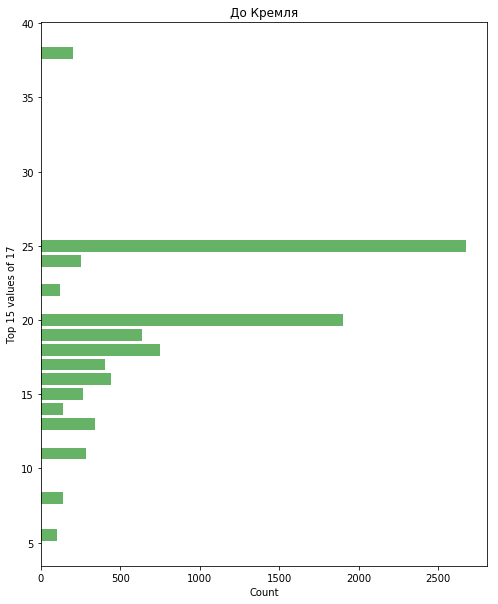

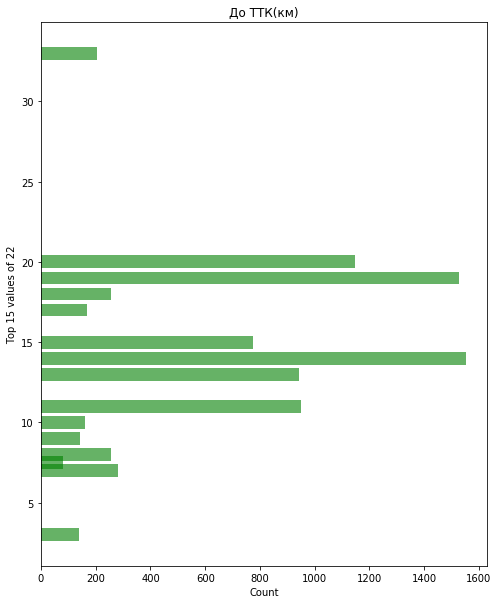

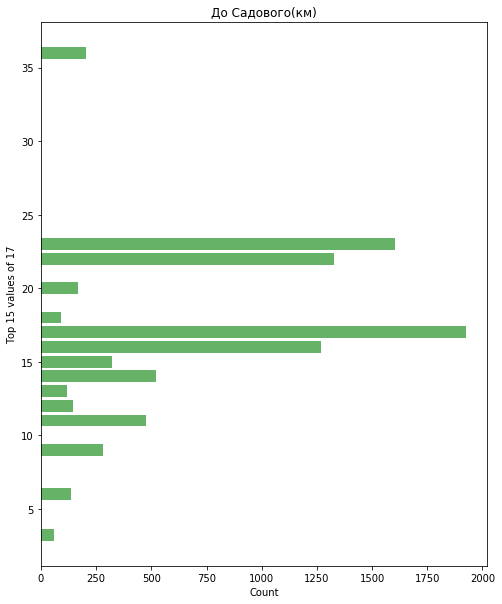

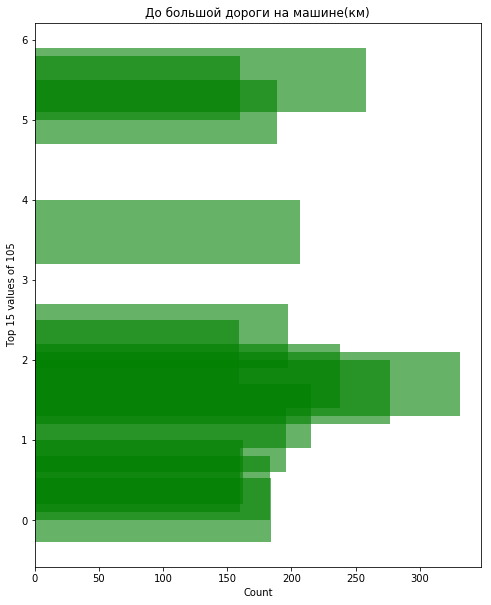

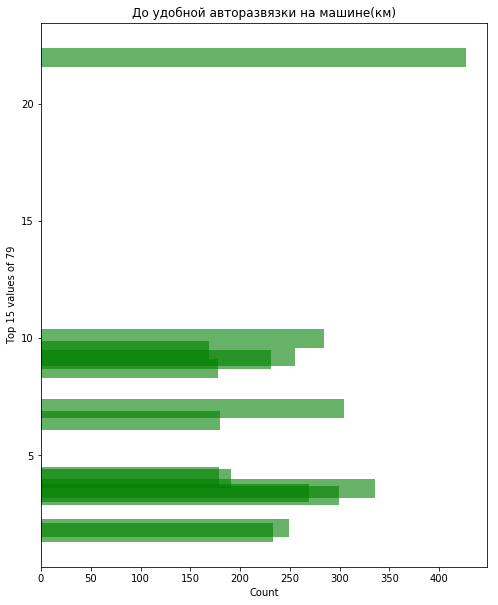

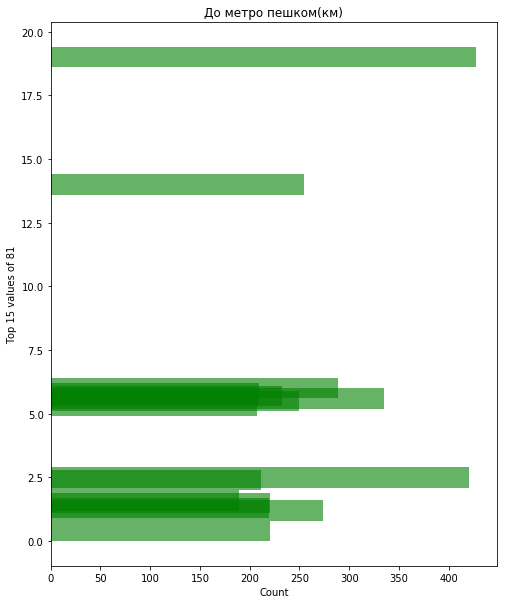

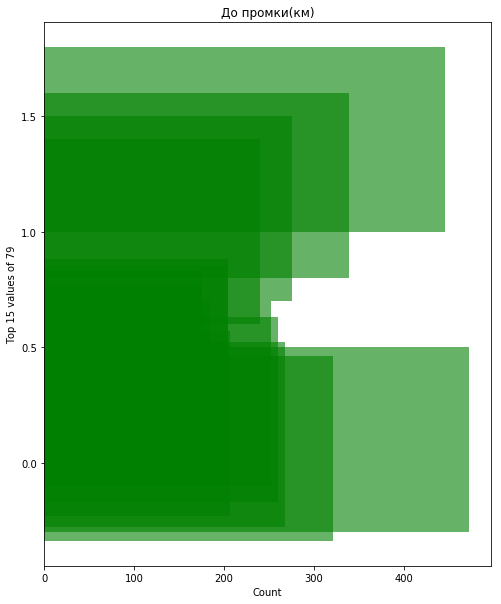

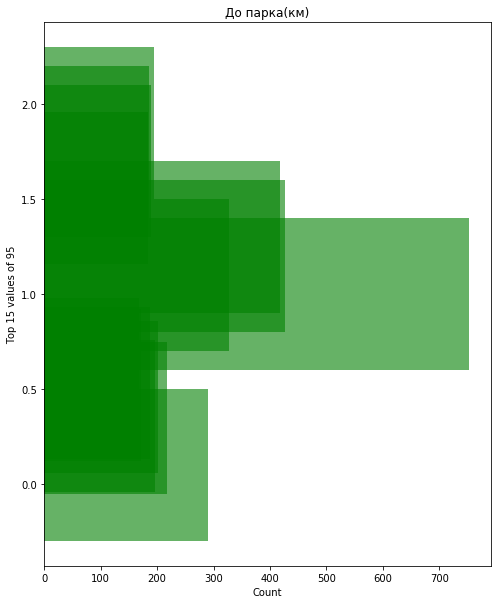

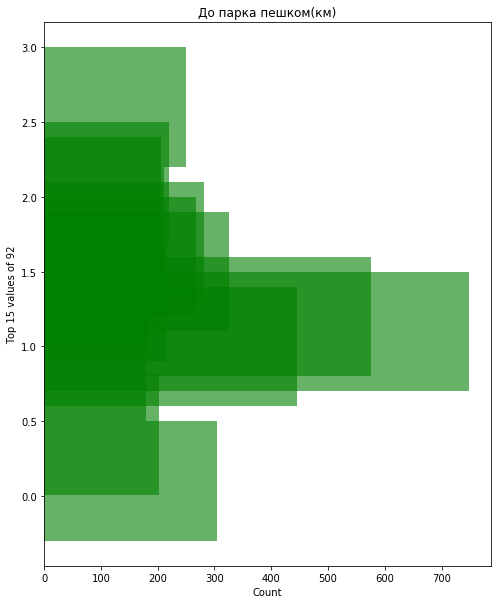

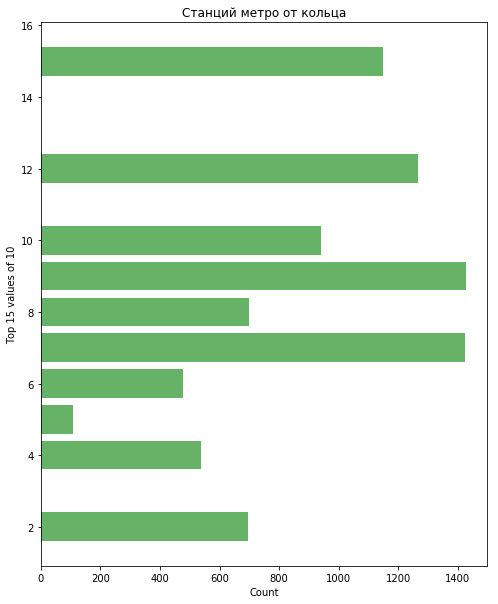

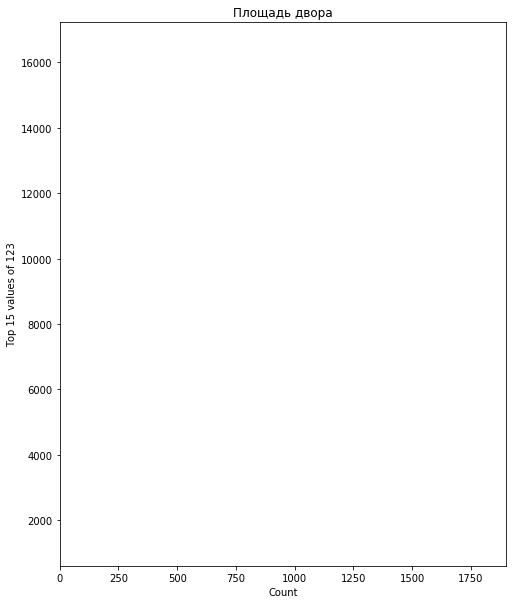

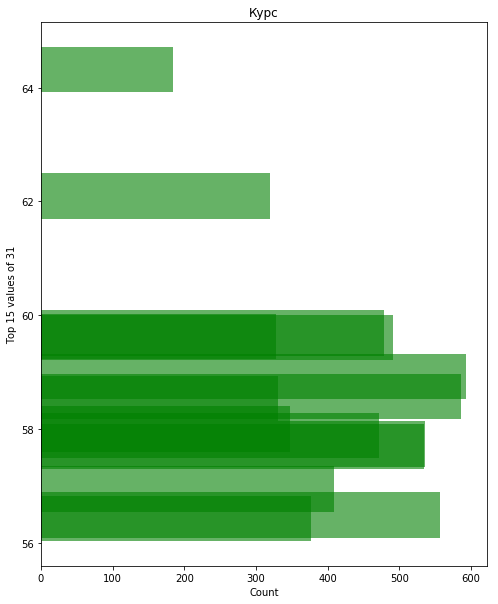

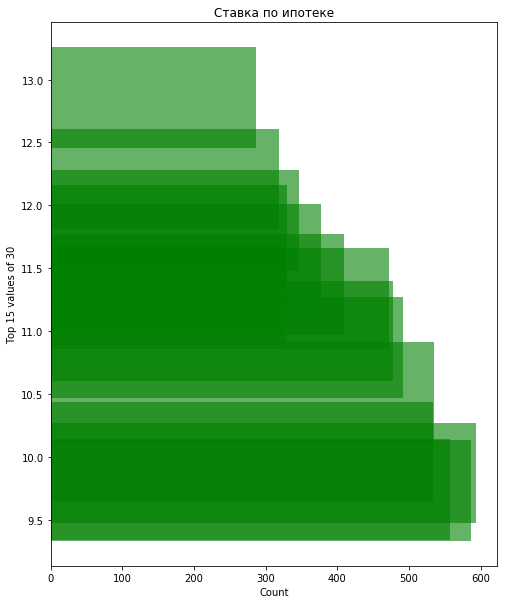

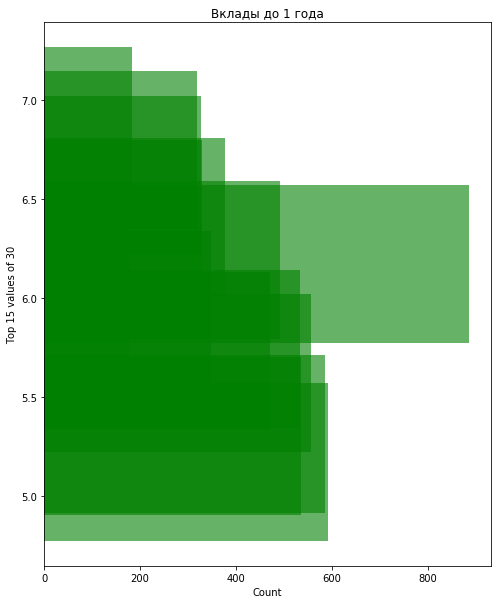

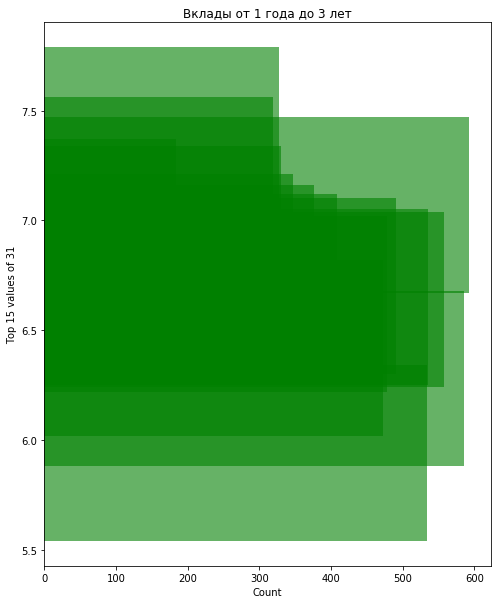

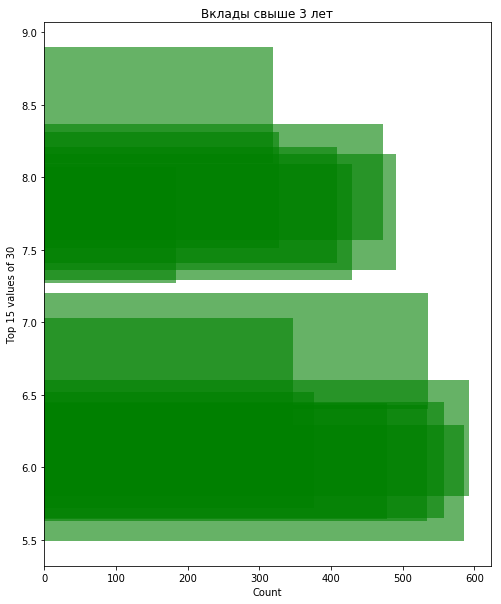

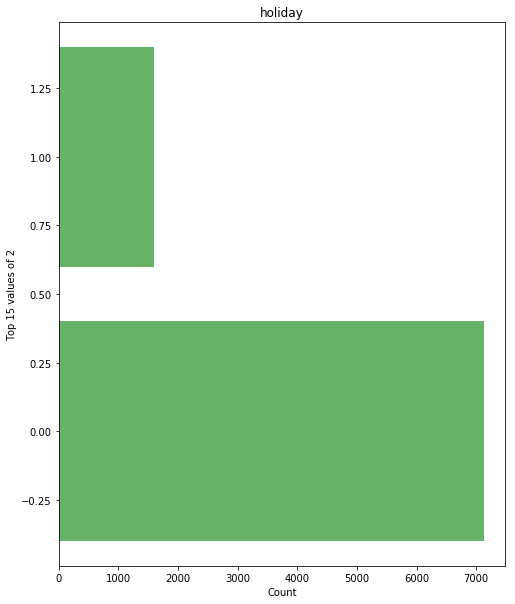

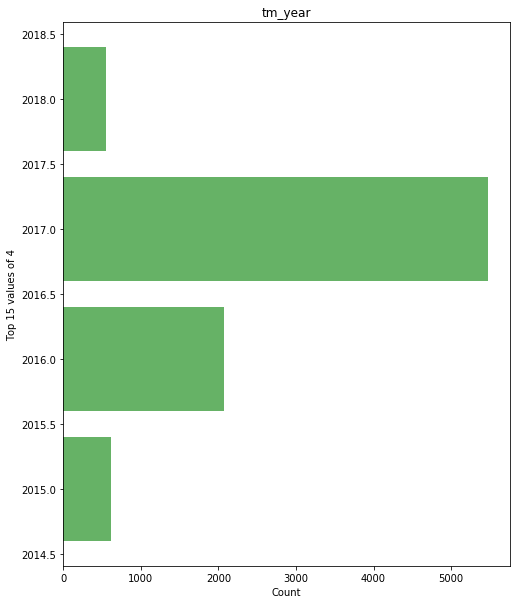

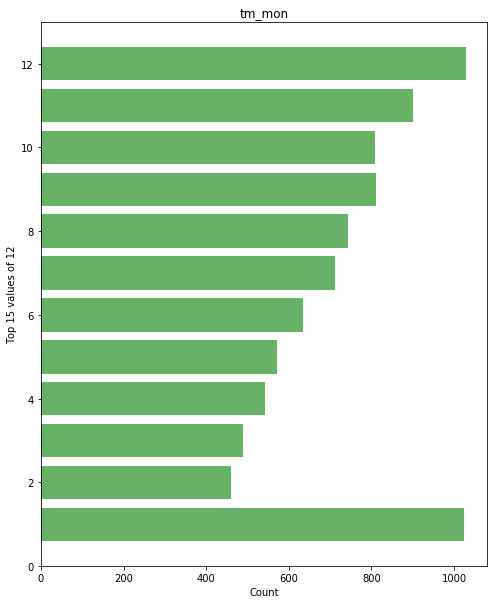

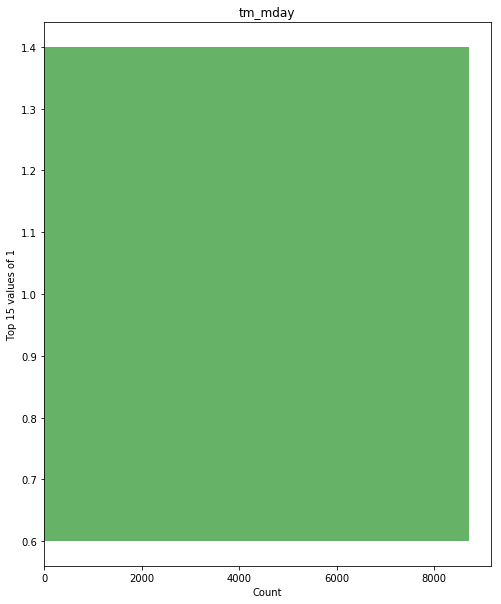

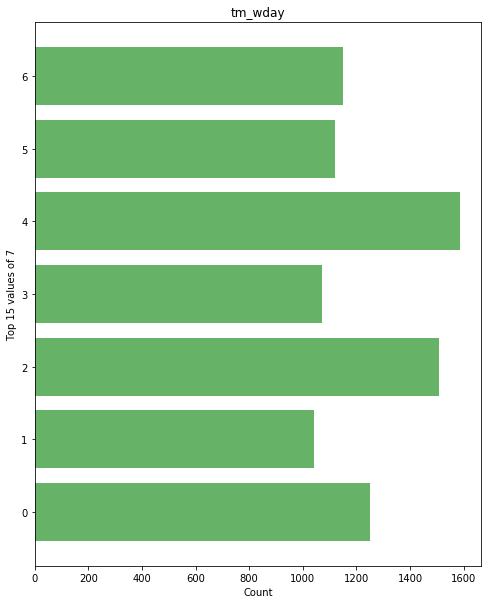

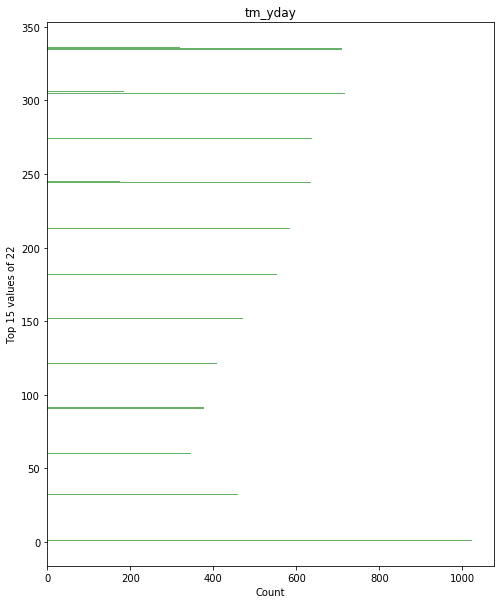

In [21]:
val_count(train, m_plot=True, name = 'First look')

In [22]:
import seaborn as sns

In [23]:
def correlation_matrix(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

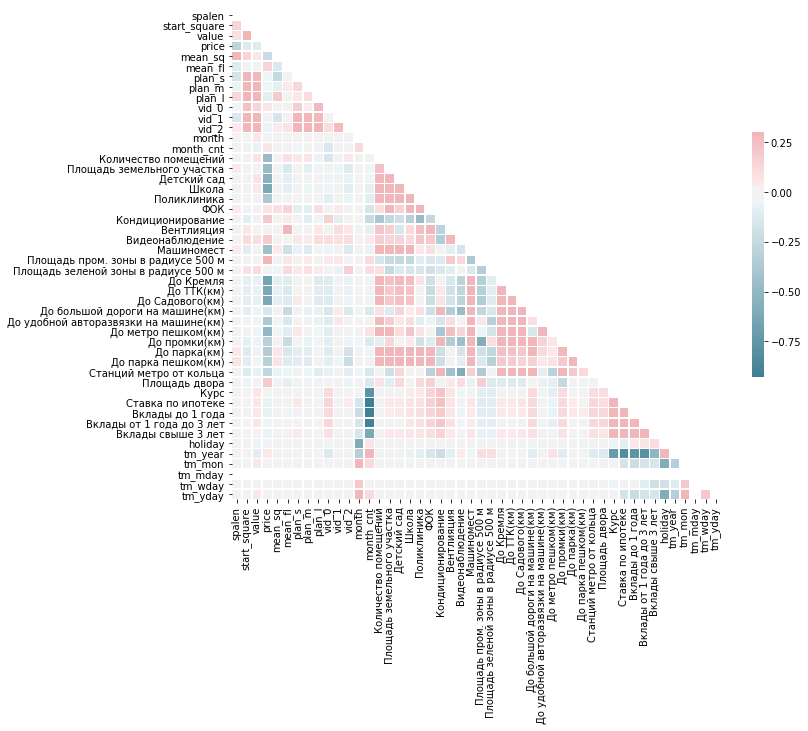

In [24]:
correlation_matrix(train)

### Find all num and cat features

In [25]:
cat_cols = [c for c in train.select_dtypes(include=['object']).columns if c not in dop_cat_cols]
num_cols = [c for c in train.select_dtypes(exclude=['object']).columns if c not in dop_cat_cols]
cat_cols = np.concatenate((dop_cat_cols, cat_cols))